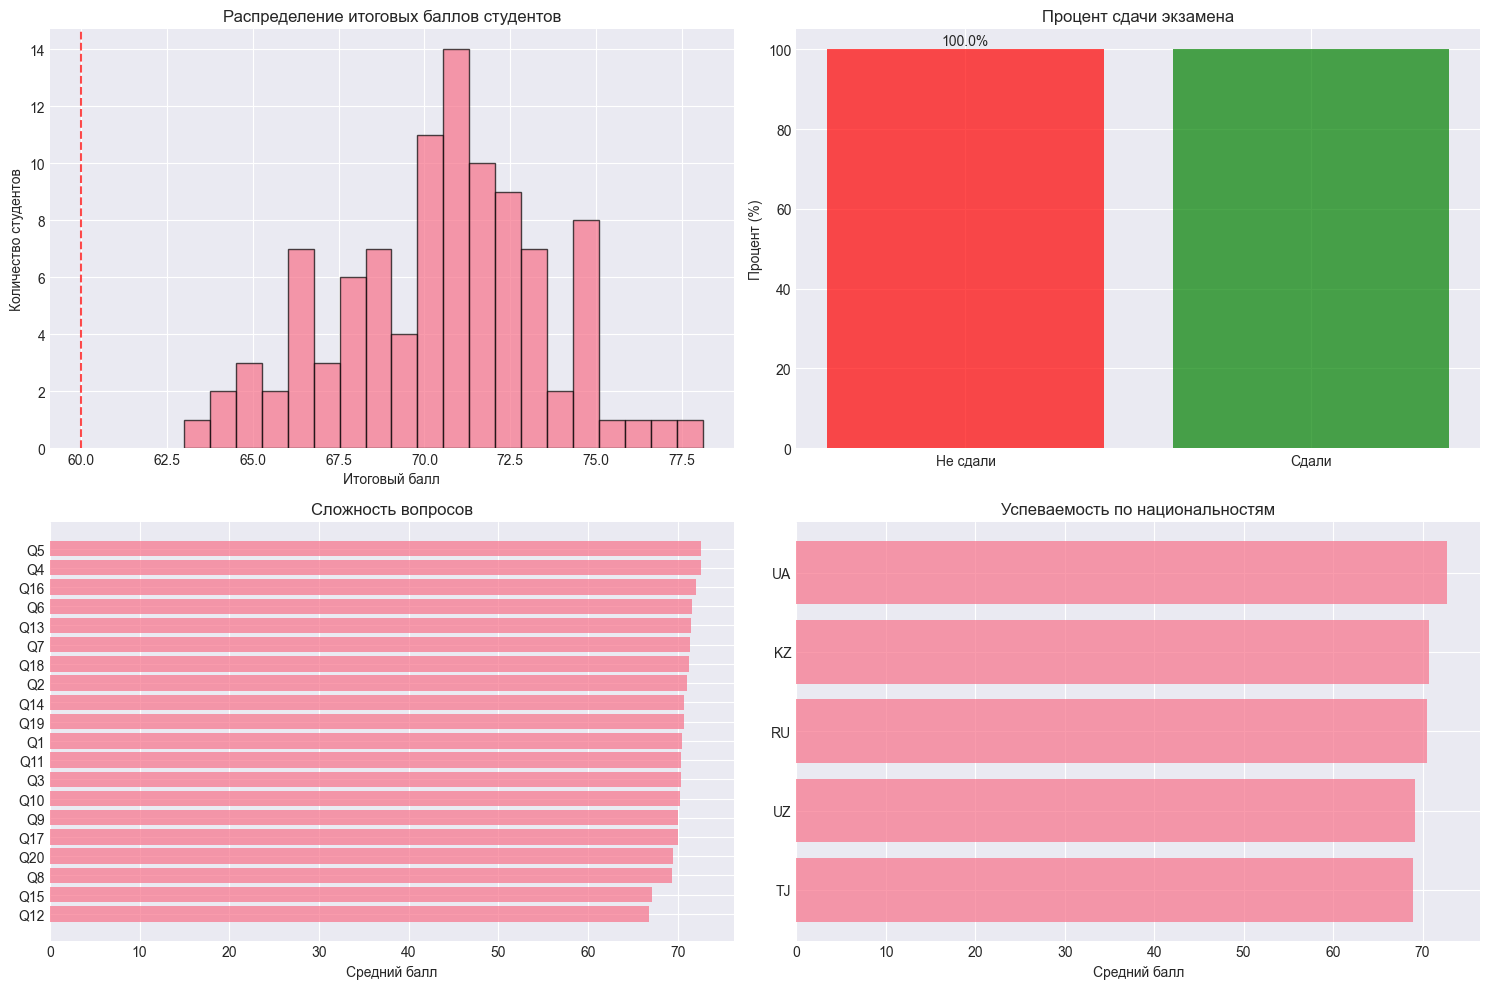

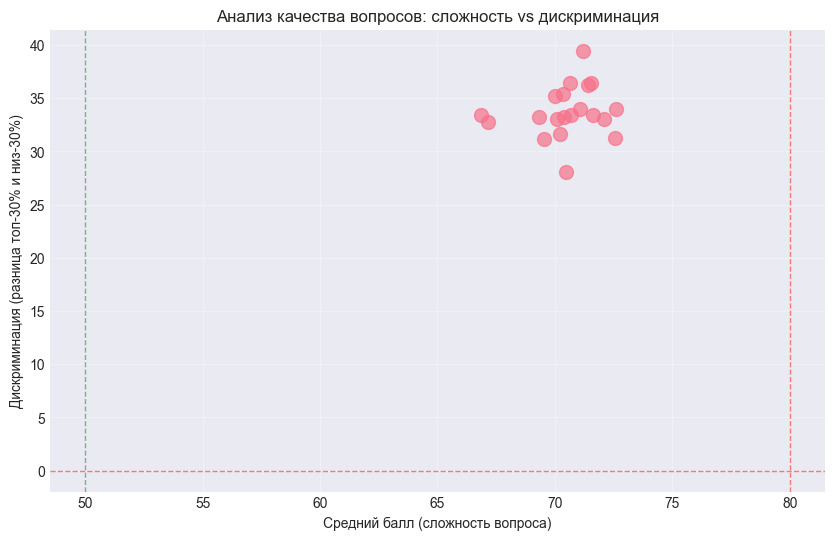

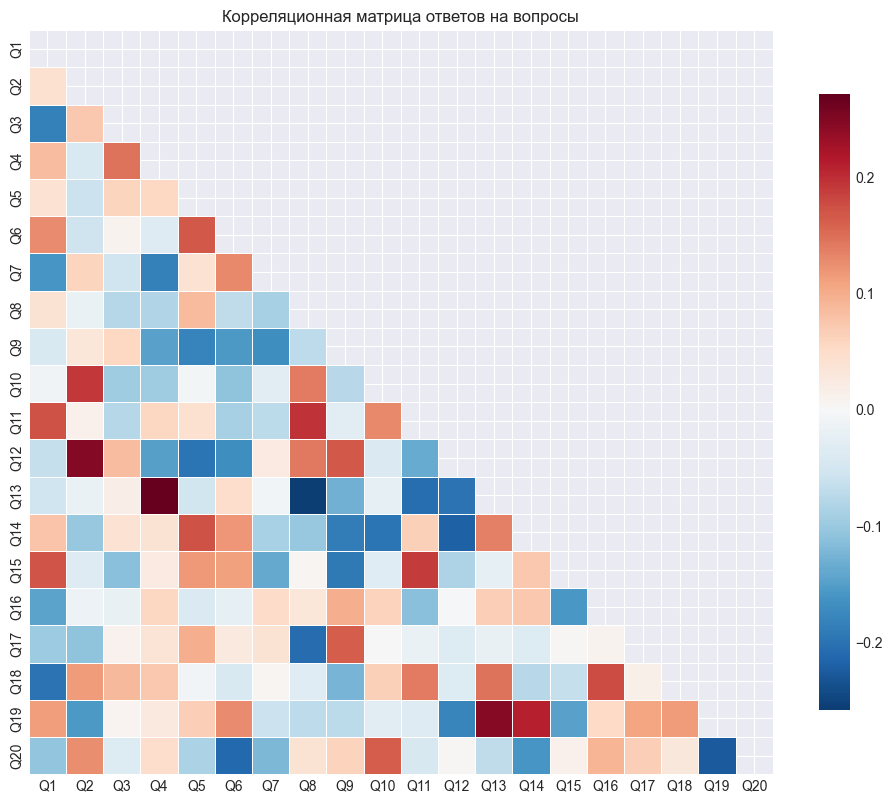

АНАЛИЗ КАЧЕСТВА ВОПРОСОВ ТЕСТА

ОБЩАЯ СТАТИСТИКА:
• Средний балл студентов: 70.5
• Процент сдачи: 100.0%
• Всего вопросов: 20
• Всего ответов: 2000

ПРОБЛЕМНЫЕ ВОПРОСЫ (отрицательная дискриминация): 0

СЛИШКОМ ЛЕГКИЕ ВОПРОСЫ (средний балл > 80): 0

СЛИШКОМ СЛОЖНЫЕ ВОПРОСЫ (средний балл < 40): 0

ХОРОШИЕ ВОПРОСЫ (высокая корреляция с итогом): 4
  • Q2: корреляция=0.304
  • Q5: корреляция=0.316
  • Q16: корреляция=0.304

КОРРЕЛЯЦИЯ С НАЦИОНАЛЬНОСТЬЮ:
  • TJ: средний балл=69.0, разница=-1.6
  • RU: средний балл=70.5, разница=-0.1
  • KZ: средний балл=70.7, разница=0.2
  • UZ: средний балл=69.2, разница=-1.4
  • UA: средний балл=72.8, разница=2.5

РЕКОМЕНДАЦИИ ДЛЯ ПРЕПОДАВАТЕЛЯ:
1. Удалить или кардинально переработать вопросы с отрицательной дискриминацией
2. Проверить слишком легкие вопросы - возможно, они не проверяют знания
3. Упростить слишком сложные вопросы или добавить разъяснения
4. Использовать вопросы с высокой корреляцией с итоговым баллом как ключевые
5. Проанализировать различ

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

project_root = Path.cwd().parent
data_path = project_root / "data" / "raw"
processed_path = project_root / "data" / "processed"

data_path.mkdir(parents=True, exist_ok=True)
processed_path.mkdir(parents=True, exist_ok=True)

np.random.seed(42)

students = []
for i in range(100):
    student = {
        'student_id': f'S{str(i+1).zfill(3)}',
        'group': np.random.choice(['A', 'B', 'C']),
        'attempts': np.random.randint(1, 5),
        'nationality': np.random.choice(['RU', 'KZ', 'UZ', 'UA', 'TJ'], p=[0.6, 0.15, 0.1, 0.1, 0.05]),
        'year': np.random.choice([2022, 2023, 2024])
    }

    scores = np.random.normal(loc=70, scale=15, size=20)
    scores = np.clip(scores, 0, 100)

    for q in range(20):
        student[f'Q{q+1}'] = round(scores[q], 1)

    student['total_score'] = round(np.sum([student[f'Q{q+1}'] for q in range(20)]) / 20, 1)
    student['passed'] = student['total_score'] >= 60

    students.append(student)

df_students = pd.DataFrame(students)
df_students.to_csv(data_path / 'students.csv', index=False, encoding='utf-8-sig')

questions = []
question_texts = [
    "Что такое дозировка препарата?",
    "Как рассчитать дозу для пациента?",
    "Побочные эффекты антибиотиков",
    "Анатомия сердца человека",
    "Физиология дыхания",
    "Метаболизм глюкозы",
    "Патогенез диабета",
    "Клиническая диагностика ОРВИ",
    "Этика врачебной тайны",
    "Неотложная помощь при инфаркте",
    "Механизм действия анальгетиков",
    "Противопоказания препаратов",
    "Топография легких",
    "Гемодинамика кровообращения",
    "Ферменты пищеварения",
    "Иммунный ответ организма",
    "Рентгенологическая диагностика",
    "Реанимационные мероприятия",
    "Фармакокинетика лекарств",
    "Взаимодействие препаратов"
]

for q in range(20):
    question = {
        'question_id': f'Q{q+1}',
        'question_text': question_texts[q],
        'topic': np.random.choice(['Фармакология', 'Анатомия', 'Физиология', 'Биохимия', 'Патология']),
        'difficulty': round(np.random.uniform(0.2, 0.8), 2),
        'syllabus_match': round(np.random.uniform(0.7, 1.0), 2),
        'type': np.random.choice(['multiple_choice', 'open_ended']),
        'max_score': np.random.choice([1, 2, 3]),
        'evaluation_criteria': np.random.choice(['Дозировка', 'Точность', 'Полнота', 'Четкость']),
        'year_added': np.random.choice([2022, 2023, 2024])
    }
    questions.append(question)

df_questions = pd.DataFrame(questions)
df_questions.to_csv(data_path / 'questions.csv', index=False, encoding='utf-8-sig')

responses = []
for i, student in enumerate(students):
    for q in range(20):
        response = {
            'response_id': f'R{str(len(responses)+1).zfill(4)}',
            'student_id': student['student_id'],
            'question_id': f'Q{q+1}',
            'score': student[f'Q{q+1}'],
            'time_spent': round(np.random.uniform(30, 300), 1),
            'attempt': np.random.randint(1, 4)
        }
        responses.append(response)

df_responses = pd.DataFrame(responses)
df_responses.to_csv(data_path / 'responses.csv', index=False, encoding='utf-8-sig')

syllabus = [
    "Фармакокинетика и фармакодинамика",
    "Дозировка лекарственных средств",
    "Побочные эффекты препаратов",
    "Анатомия сердечно-сосудистой системы",
    "Физиология дыхательной системы",
    "Биохимия метаболизма",
    "Патогенез заболеваний",
    "Клиническая диагностика",
    "Медицинская этика",
    "Неотложная медицинская помощь"
]

with open(data_path / 'syllabus.txt', 'w', encoding='utf-8') as f:
    for line in syllabus:
        f.write(line + '\n')

rejected_questions = [
    "Какой препарат самый сильный?",
    "Почему некоторые национальности болеют чаще?",
    "Женщины более восприимчивы к боли?",
    "Старые лекарства лучше новых?"
]

with open(data_path / 'rejected_questions.txt', 'w', encoding='utf-8') as f:
    for line in rejected_questions:
        f.write(line + '\n')

df_students = pd.read_csv(data_path / 'students.csv')
df_questions = pd.read_csv(data_path / 'questions.csv')
df_responses = pd.read_csv(data_path / 'responses.csv')

question_columns = [col for col in df_students.columns if col.startswith('Q')]

question_stats = []
for q_col in question_columns:
    q_data = df_students[q_col]
    q_stats = {
        'question': q_col,
        'mean': round(q_data.mean(), 2),
        'median': round(q_data.median(), 2),
        'std': round(q_data.std(), 2),
        'min': round(q_data.min(), 2),
        'max': round(q_data.max(), 2),
        'pass_rate': round((q_data >= 60).sum() / len(q_data) * 100, 1)
    }

    top_30 = int(len(q_data) * 0.3)
    bottom_30 = int(len(q_data) * 0.3)

    sorted_scores = q_data.sort_values(ascending=False)
    top_mean = sorted_scores[:top_30].mean()
    bottom_mean = sorted_scores[-bottom_30:].mean()

    q_stats['discrimination'] = round(top_mean - bottom_mean, 2)
    question_stats.append(q_stats)

df_question_stats = pd.DataFrame(question_stats)

correlations = []
for q_col in question_columns:
    corr = df_students[q_col].corr(df_students['total_score'])
    correlations.append({
        'question': q_col,
        'correlation_with_total': round(corr, 3),
        'importance': 'Высокая' if abs(corr) > 0.3 else 'Средняя' if abs(corr) > 0.1 else 'Низкая'
    })

df_correlations = pd.DataFrame(correlations)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0,0].hist(df_students['total_score'], bins=20, edgecolor='black', alpha=0.7)
axes[0,0].set_xlabel('Итоговый балл')
axes[0,0].set_ylabel('Количество студентов')
axes[0,0].set_title('Распределение итоговых баллов студентов')
axes[0,0].axvline(x=60, color='r', linestyle='--', alpha=0.7)

passed_rate = df_students['passed'].value_counts(normalize=True) * 100
axes[0,1].bar(['Не сдали', 'Сдали'], passed_rate.values, color=['red', 'green'], alpha=0.7)
axes[0,1].set_ylabel('Процент (%)')
axes[0,1].set_title('Процент сдачи экзамена')
for i, v in enumerate(passed_rate.values):
    axes[0,1].text(i, v + 1, f'{v:.1f}%', ha='center')

question_means = df_students[question_columns].mean().sort_values()
axes[1,0].barh(range(len(question_means)), question_means.values, alpha=0.7)
axes[1,0].set_yticks(range(len(question_means)))
axes[1,0].set_yticklabels(question_means.index)
axes[1,0].set_xlabel('Средний балл')
axes[1,0].set_title('Сложность вопросов')

nationality_scores = df_students.groupby('nationality')['total_score'].mean().sort_values()
axes[1,1].barh(range(len(nationality_scores)), nationality_scores.values, alpha=0.7)
axes[1,1].set_yticks(range(len(nationality_scores)))
axes[1,1].set_yticklabels(nationality_scores.index)
axes[1,1].set_xlabel('Средний балл')
axes[1,1].set_title('Успеваемость по национальностям')

plt.tight_layout()
plt.savefig(processed_path / 'basic_stats.png', dpi=150, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_question_stats['mean'], df_question_stats['discrimination'], alpha=0.7, s=100)
plt.xlabel('Средний балл (сложность вопроса)')
plt.ylabel('Дискриминация (разница топ-30% и низ-30%)')
plt.title('Анализ качества вопросов: сложность vs дискриминация')

for idx, row in df_question_stats.iterrows():
    if row['discrimination'] < 0:
        plt.annotate(row['question'], (row['mean'], row['discrimination']),
                    xytext=(5, 5), textcoords='offset points', fontsize=9, color='red',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.5))
    elif row['mean'] < 50:
        plt.annotate(row['question'], (row['mean'], row['discrimination']),
                    xytext=(5, 5), textcoords='offset points', fontsize=8, color='orange')

plt.axhline(y=0, color='r', linestyle='--', alpha=0.5, linewidth=1)
plt.axvline(x=50, color='g', linestyle='--', alpha=0.5, linewidth=1)
plt.axvline(x=80, color='r', linestyle='--', alpha=0.5, linewidth=1)

plt.grid(True, alpha=0.3)
plt.savefig(processed_path / 'question_quality.png', dpi=150, bbox_inches='tight')
plt.show()

question_corr_matrix = df_students[question_columns].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(question_corr_matrix, dtype=bool))
sns.heatmap(question_corr_matrix, mask=mask, cmap='RdBu_r', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8},
            annot=False, fmt='.2f')
plt.title('Корреляционная матрица ответов на вопросы')
plt.savefig(processed_path / 'correlation_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

question_summary = df_question_stats.merge(df_correlations, on='question')
question_summary = question_summary.merge(df_questions[['question_id', 'topic', 'evaluation_criteria']],
                                          left_on='question', right_on='question_id', how='left')

question_summary['quality_category'] = question_summary.apply(
    lambda row: 'ПРОБЛЕМНЫЙ' if row['discrimination'] < 0 else
               'СЛИШКОМ ЛЕГКИЙ' if row['mean'] > 80 else
               'СЛИШКОМ СЛОЖНЫЙ' if row['mean'] < 40 else
               'ХОРОШИЙ' if row['correlation_with_total'] > 0.3 else
               'СРЕДНИЙ', axis=1
)

question_summary['recommendation'] = question_summary.apply(
    lambda row: 'УДАЛИТЬ' if row['discrimination'] < 0 else
               'ПЕРЕСМОТРЕТЬ' if row['mean'] > 80 or row['mean'] < 40 else
               'ОСТАВИТЬ' if row['correlation_with_total'] > 0.2 else
               'ПРОВЕРИТЬ', axis=1
)

df_question_stats.to_csv(processed_path / 'question_statistics.csv', index=False, encoding='utf-8-sig')
df_correlations.to_csv(processed_path / 'correlations.csv', index=False, encoding='utf-8-sig')
question_summary.to_csv(processed_path / 'question_summary.csv', index=False, encoding='utf-8-sig')

response_stats = df_responses.groupby('question_id').agg({
    'score': ['mean', 'std', 'count'],
    'time_spent': 'mean'
}).round(2)

response_stats.columns = ['avg_score', 'std_score', 'response_count', 'avg_time']
response_stats = response_stats.sort_values('avg_score')
response_stats.to_csv(processed_path / 'response_statistics.csv', encoding='utf-8-sig')

nationality_comparison = df_students.groupby('nationality').agg({
    'total_score': ['mean', 'std', 'count'],
    'passed': 'mean'
}).round(2)

nationality_comparison.columns = ['avg_score', 'std_score', 'count', 'pass_rate']
nationality_comparison['pass_rate'] = (nationality_comparison['pass_rate'] * 100).round(1)
nationality_comparison.to_csv(processed_path / 'nationality_stats.csv', encoding='utf-8-sig')

group_year_stats = df_students.groupby(['group', 'year']).agg({
    'total_score': ['mean', 'count'],
    'passed': 'mean'
}).round(2)

group_year_stats.columns = ['avg_score', 'student_count', 'pass_rate']
group_year_stats['pass_rate'] = (group_year_stats['pass_rate'] * 100).round(1)
group_year_stats.to_csv(processed_path / 'group_year_stats.csv', encoding='utf-8-sig')

bad_questions = question_summary[question_summary['quality_category'] == 'ПРОБЛЕМНЫЙ']
easy_questions = question_summary[question_summary['quality_category'] == 'СЛИШКОМ ЛЕГКИЙ']
hard_questions = question_summary[question_summary['quality_category'] == 'СЛИШКОМ СЛОЖНЫЙ']
good_questions = question_summary[question_summary['quality_category'] == 'ХОРОШИЙ']

print("="*80)
print("АНАЛИЗ КАЧЕСТВА ВОПРОСОВ ТЕСТА")
print("="*80)

print(f"\nОБЩАЯ СТАТИСТИКА:")
print(f"• Средний балл студентов: {df_students['total_score'].mean():.1f}")
print(f"• Процент сдачи: {df_students['passed'].mean()*100:.1f}%")
print(f"• Всего вопросов: {len(df_question_stats)}")
print(f"• Всего ответов: {len(df_responses)}")

print(f"\nПРОБЛЕМНЫЕ ВОПРОСЫ (отрицательная дискриминация): {len(bad_questions)}")
if not bad_questions.empty:
    for _, row in bad_questions.iterrows():
        print(f"  • {row['question']}: средний балл={row['mean']}, дискриминация={row['discrimination']:.2f}")

print(f"\nСЛИШКОМ ЛЕГКИЕ ВОПРОСЫ (средний балл > 80): {len(easy_questions)}")
if not easy_questions.empty:
    for _, row in easy_questions.head(3).iterrows():
        print(f"  • {row['question']}: средний балл={row['mean']}")

print(f"\nСЛИШКОМ СЛОЖНЫЕ ВОПРОСЫ (средний балл < 40): {len(hard_questions)}")
if not hard_questions.empty:
    for _, row in hard_questions.head(3).iterrows():
        print(f"  • {row['question']}: средний балл={row['mean']}")

print(f"\nХОРОШИЕ ВОПРОСЫ (высокая корреляция с итогом): {len(good_questions)}")
if not good_questions.empty:
    for _, row in good_questions.head(3).iterrows():
        print(f"  • {row['question']}: корреляция={row['correlation_with_total']:.3f}")

print(f"\nКОРРЕЛЯЦИЯ С НАЦИОНАЛЬНОСТЬЮ:")
for nationality in df_students['nationality'].unique():
    group_data = df_students[df_students['nationality'] == nationality]
    other_data = df_students[df_students['nationality'] != nationality]
    diff = group_data['total_score'].mean() - other_data['total_score'].mean()
    print(f"  • {nationality}: средний балл={group_data['total_score'].mean():.1f}, разница={diff:.1f}")

print(f"\nРЕКОМЕНДАЦИИ ДЛЯ ПРЕПОДАВАТЕЛЯ:")
print("1. Удалить или кардинально переработать вопросы с отрицательной дискриминацией")
print("2. Проверить слишком легкие вопросы - возможно, они не проверяют знания")
print("3. Упростить слишком сложные вопросы или добавить разъяснения")
print("4. Использовать вопросы с высокой корреляцией с итоговым баллом как ключевые")
print("5. Проанализировать различия в успеваемости между группами")

print(f"\nСОХРАНЕННЫЕ ФАЙЛЫ:")
print(f"• {processed_path / 'basic_stats.png'}")
print(f"• {processed_path / 'question_quality.png'}")
print(f"• {processed_path / 'correlation_matrix.png'}")
print(f"• {processed_path / 'question_summary.csv'}")
print(f"• {processed_path / 'correlations.csv'}")
print(f"• {processed_path / 'nationality_stats.csv'}")